# Import

In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [25]:
raw_df = gpd.read_file("datasets/3_combined/df.gpkg")
raw_df_with_age_gender_fe = gpd.read_file("datasets/4_fe/df_with_age_gender_fe.gpkg")
raw_df_with_full_fe = gpd.read_file("datasets/4_fe/df_with_full_fe.gpkg")

In [26]:
df = raw_df.copy()
df_with_age_gender_fe = raw_df_with_age_gender_fe.copy()
df_with_full_fe = raw_df_with_full_fe.copy()

# Define outliers

In [27]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Calculate health outliers

In [28]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


# Plot health outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x25122c09f90>,
 'caps': [<matplotlib.lines.Line2D at 0x25122c0a210>,
 'boxes': [<matplotlib.lines.Line2D at 0x25122c09e50>],
 'medians': [<matplotlib.lines.Line2D at 0x25122c0a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x25122c0a5d0>],
 'means': []}

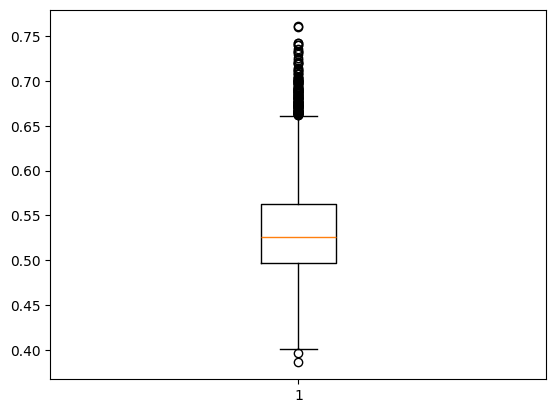

In [29]:
plt.boxplot(df["very_good_health"])

# Plot health distribution

(array([  20.,  193., 1006., 1501.,  972.,  499.,  270.,  132.,   53.,
          13.]),
 array([0.38580931, 0.42330246, 0.4607956 , 0.49828874, 0.53578188,
        0.57327503, 0.61076817, 0.64826131, 0.68575446, 0.7232476 ,
        0.76074074]),
 <BarContainer object of 10 artists>)

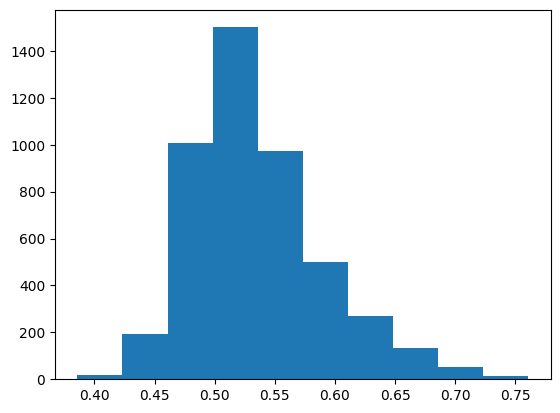

In [30]:
plt.hist(df["very_good_health"])

# Calculate greenspace proportion outliers

In [31]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


# Plot greenspace proportion outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x25123106350>,
 'caps': [<matplotlib.lines.Line2D at 0x251231065d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25123106210>],
 'medians': [<matplotlib.lines.Line2D at 0x25123106850>],
 'fliers': [<matplotlib.lines.Line2D at 0x25123106990>],
 'means': []}

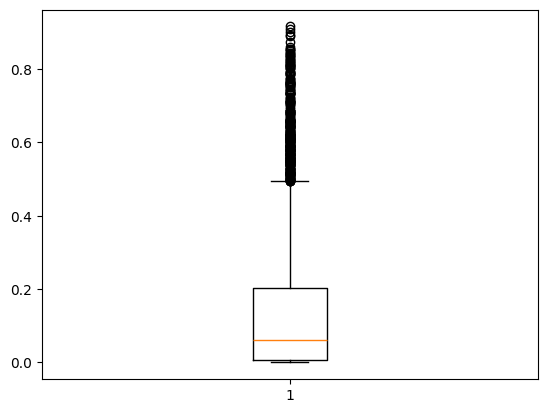

In [32]:
plt.boxplot(df["greenspace_proportion"])

# Plot greenspace proportion distribution

(array([2685.,  708.,  404.,  296.,  189.,  138.,  107.,   61.,   50.,
          21.]),
 array([0.        , 0.09156631, 0.18313262, 0.27469893, 0.36626524,
        0.45783155, 0.54939786, 0.64096417, 0.73253048, 0.82409679,
        0.91566309]),
 <BarContainer object of 10 artists>)

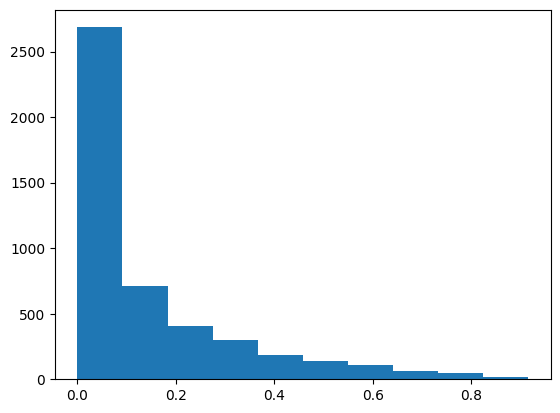

In [33]:
plt.hist(df["greenspace_proportion"])

# Calculate collinearity of full dataset

In [34]:
drop_cols = ["lsoa", "very_good_health", "good_health", "fair_health", "bad_health", "very_bad_health", "total_area", "greenspace_area", "geometry"]

In [35]:
coll_df = df.copy()
coll_df = df.drop(columns = drop_cols)

In [36]:
vif_data = pd.DataFrame()
vif_data["Feature"] = coll_df.columns
vif_data["VIF"] = [variance_inflation_factor(coll_df.values, i) for i in range (coll_df.shape[1])]

c:\Users\Natha\Dev\irp\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [37]:
vif_data.to_csv("outputs/vif_data.csv", index=0)

# Calculate collinearity after age + gender feature engineering

In [38]:
coll_age_gender_df = df_with_age_gender_fe.copy()
coll_age_gender_df = coll_age_gender_df.drop(columns = drop_cols)

In [39]:
vif_age_gender_data = pd.DataFrame()
vif_age_gender_data["Feature"] = coll_age_gender_df.columns
vif_age_gender_data["VIF"] = [variance_inflation_factor(coll_age_gender_df.values, i) for i in range (coll_age_gender_df.shape[1])]

In [40]:
vif_age_gender_data.to_csv("outputs/vif_age_gender_data.csv", index = 0)

# Plot ethnicity feature correlations

In [41]:
ethnicity_cols = ["white_british", "white_irish", "white_other", "white_gypsy/irish_traveller", "white_roma", "asian_bangladeshi", "asian_indian", "asian_pakistani", "asian_chinese", "asian_other","black_african", "black_caribbean", "black_other", "mixed_white_and_asian", "mixed_white_and_black_african", "mixed_white_and_black_caribbean", "mixed_other", "other_arab", "any_other"]

In [42]:
ethnicity_corrs = df[ethnicity_cols].corr()

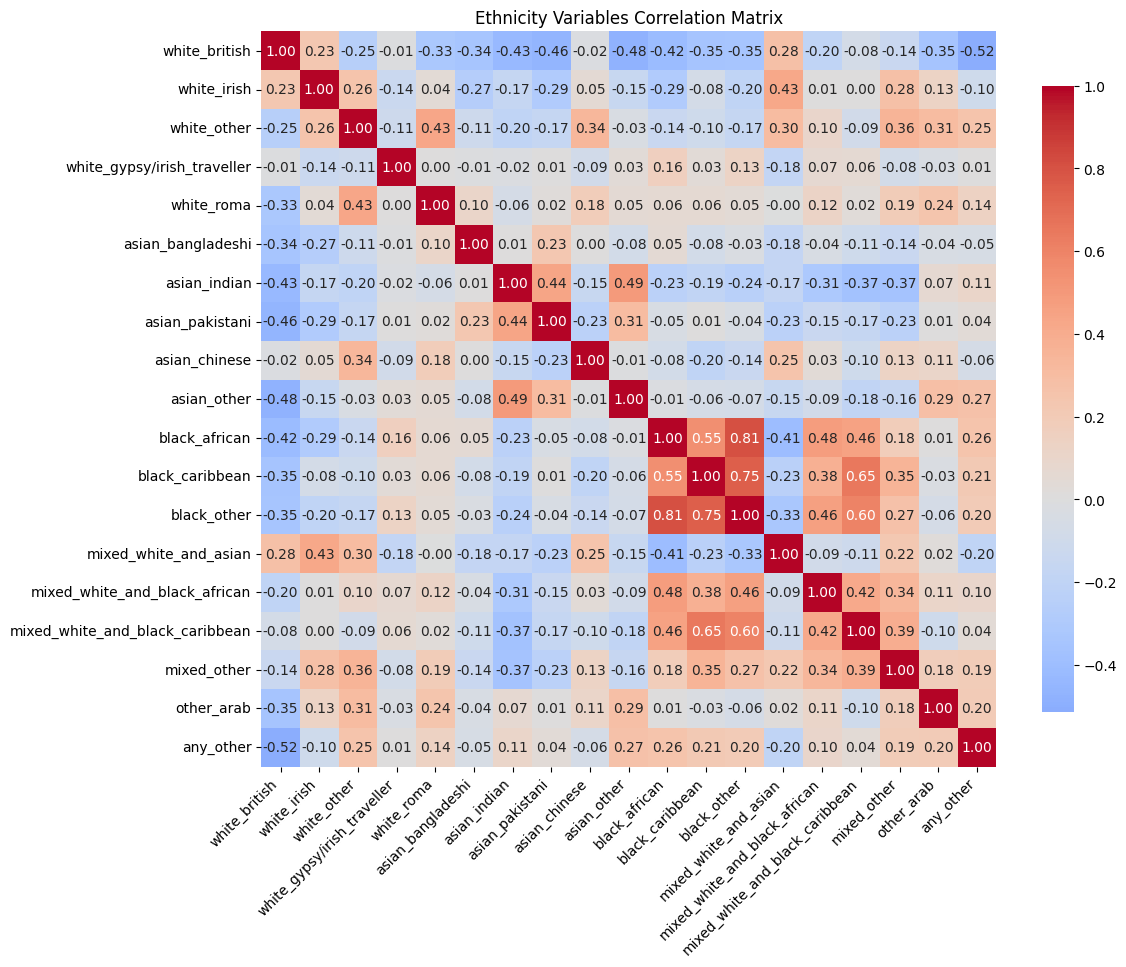

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(ethnicity_corrs, annot=True, cmap="coolwarm", center=0, 
            square=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("Ethnicity Variables Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate collinearity after full feature engineering

In [50]:
coll_fe_df = df_with_full_fe.copy()
coll_fe_df = coll_fe_df.drop(columns = drop_cols)

In [51]:
vif_fe_data = pd.DataFrame()
vif_fe_data["Feature"] = coll_fe_df.columns
vif_fe_data["VIF"] = [variance_inflation_factor(coll_fe_df.values, i) for i in range (coll_fe_df.shape[1])]

In [52]:
print(vif_fe_data)

                        Feature           VIF
0                           imd      7.390069
1         greenspace_proportion      1.669620
2                       x_coord  68521.648319
3                       y_coord  68573.575841
4                      mean_age    183.998312
5                     f_m_ratio    158.577872
6   prevalent_asian_bangladeshi     72.742884
7        prevalent_asian_indian    178.664608
8         prevalent_asian_other     10.379882
9     prevalent_asian_pakistani     21.338229
10      prevalent_black_african    102.301743
11    prevalent_black_caribbean     10.351544
12         prevalent_other_arab      3.957441
13      prevalent_white_british   1757.863124
14        prevalent_white_other    151.731016


In [61]:
coll_fe_df = coll_fe_df.drop(columns = ["x_coord", "y_coord"])

In [62]:
vif_fe_data = pd.DataFrame()
vif_fe_data["Feature"] = coll_fe_df.columns
vif_fe_data["VIF"] = [variance_inflation_factor(coll_fe_df.values, i) for i in range (coll_fe_df.shape[1])]

In [63]:
print(vif_fe_data)

                        Feature         VIF
0                           imd    7.314294
1         greenspace_proportion    1.667292
2                      mean_age  174.185296
3                     f_m_ratio  150.840516
4   prevalent_asian_bangladeshi    7.959770
5        prevalent_asian_indian   19.890226
6         prevalent_asian_other    1.974005
7     prevalent_asian_pakistani    2.992186
8       prevalent_black_african   12.477095
9     prevalent_black_caribbean    2.095682
10         prevalent_other_arab    1.339035
11      prevalent_white_british  206.675501
12        prevalent_white_other   17.448729
